In [ ]:
# Brownian v2 and v3 in this file. v2 is just for archival purpose. Use v3 for multiprocessing.

In [260]:
import random, matplotlib.pyplot as plt, time, math, multiprocessing, concurrent.futures
import numpy as np

#plt.style.use(['science'])

def flatten(xss):
    return [x for xs in xss for x in xs]

gamma,Radius_of_circle=1,1
sigma,drift,potential_constant,time2=0.1,0.65,1,10

ram0=1024
def brownian_v3(iterations):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time2]
    intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    #intial_pos=1.0
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time2/dt) #Total time
    std=np.sqrt(dt*sigma)
    
    
    coeff=np.zeros((iterations,ram0))
    
    leftmax=np.arcsin(-Radius_of_circle*drift/potential_constant)
    rightmax=leftmax+2*np.pi
    
    
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(-np.sin(theta))/Radius_of_circle)*dt)
            
        shift=np.pi+np.arcsin(-Radius_of_circle*drift/potential_constant)
        
        theta2=theta-shift-np.floor((theta-shift-np.pi)/(2*np.pi))*2*np.pi-2*np.pi
        
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time2
        
        #coeff[n]=theta2-theta0
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()


    return pos,cur #D

if __name__ == "__main__":
    iterations=10**3

    with concurrent.futures.ProcessPoolExecutor() as executor:
        start_time = time.perf_counter()
        temp = list(executor.map(brownian_v3, [10 for i in range(int(iterations/10))]))
        finish_time = time.perf_counter()
    print(f"Program finished in {finish_time-start_time} seconds")
    

results = [[temp[j][i] for j in range(len(temp))] for i in range(len(temp[0]))]
pos = flatten(results[0])
cur = flatten(results[1])

print(len(cur))


Program finished in 0.5987368118949234 seconds
1024000


In [261]:
intialpos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi

leftmax=np.arcsin(-Radius_of_circle*drift/potential_constant)
rightmax=leftmax+2*np.pi

thetas=[x * time2/Radius_of_circle -np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi for x in cur]

coeffs=[]

for i in range(len(thetas)):
    if leftmax<thetas[i]<rightmax:
        coeff=-1
    else:
        coeff=1
    coeffs.append(coeff)


yx=list(zip(pos,coeffs))
yx.sort()

coeffs2 = [x for y, x in yx]

m = 1

pos2=[y for y, x in yx]

bins=30

sums, edges = np.histogram(pos2, bins=bins, weights=coeffs2)
counts, _ = np.histogram(pos2, bins=bins)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

edges2=moving_average(edges, 2)      


sumsnp=np.array(sums, dtype=float)
countsnp=np.array(counts, dtype=float)

avgdel = np.divide(sumsnp , countsnp ,out=np.zeros_like(sumsnp), where=countsnp!=0)

avg=[]
posx=[]

for i in range(len(edges2)):
    if avgdel[i]!=0:
        posx.append(edges2[i])
        avg.append(avgdel[i])

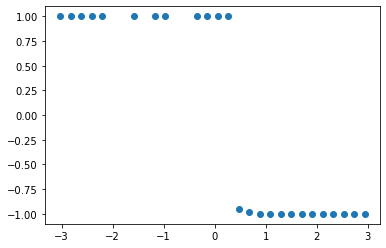

In [262]:
plt.scatter(posx, avg)



<function matplotlib.pyplot.show(close=None, block=None)>

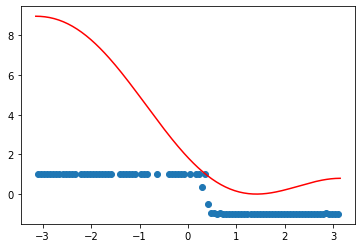

In [230]:
plt.scatter(posx, avg)

shift=np.pi+np.arcsin(-Radius_of_circle*drift/potential_constant)

X = np.linspace(-np.pi, np.pi, 200)
Y= np.cos(X+shift)-drift*(X+shift)-min(np.cos(X+shift)-drift*(X+shift))

plt.plot(X, 2*Y,'r-')

plt.show

In [147]:
np.histogram(pos2,bins=100)
pos2
#coeffs2

[-2.349549388095961,
 -2.204981238479938,
 -1.620978891914925,
 -1.268106251238315,
 -0.2977449308725273,
 0.4973064675565597,
 0.557738447647588,
 0.5960322161759608,
 0.6211614772514622,
 0.6539409380114236,
 0.661794951094457,
 0.6671654465455603,
 0.6759330719206851,
 0.6775024227918705,
 0.6842011976685587,
 0.6908822827786381,
 0.693863524683028,
 0.6974500412272562,
 0.7005367831211995,
 0.7078075650754645,
 0.7091020908365415,
 0.7094961859155591,
 0.7123855938334511,
 0.714738263283385,
 0.7264705693329647,
 0.7291852928702109,
 0.7299360427717545,
 0.7334787368923461,
 0.734904128011383,
 0.7359692802717337,
 0.7412215747948867,
 0.7414909067023103,
 0.7464683892962327,
 0.7467015457944779,
 0.7501636154642695,
 0.7541540135042197,
 0.7546904980933684,
 0.7558046098216096,
 0.7559442045552274,
 0.7567655057053013,
 0.7576489222714375,
 0.7580998232970879,
 0.7595012407778041,
 0.7622960547066295,
 0.7628716023063475,
 0.7649239086031727,
 0.7720493817487348,
 0.77302639213884

(array([3.2000e+01, 0.0000e+00, 0.0000e+00, 1.6000e+01, 0.0000e+00,
        1.6000e+01, 0.0000e+00, 0.0000e+00, 2.0000e+01, 0.0000e+00,
        0.0000e+00, 1.6000e+01, 2.0000e+01, 0.0000e+00, 1.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01, 1.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.4000e+01, 5.2000e+01, 8.4000e+01,
        3.0800e+02, 6.6000e+02, 1.7360e+03, 3.3640e+03, 6.1760e+03,
        1.0752e+04, 1.7900e+04, 2.8592e+04, 4.0336e+04, 5.3592e+04,
        6.6644e+04, 8.0120e+04, 8.9236e+04, 9.29

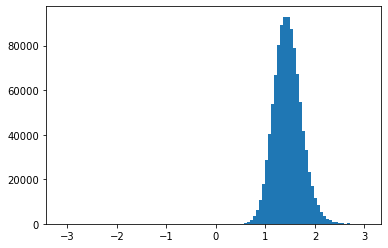

In [129]:
plt.hist(pos2,bins=100)

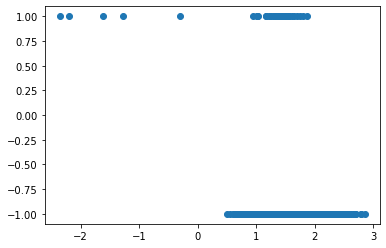

In [143]:
plt.scatter(pos,coeffs)

In [109]:
pos2

In [92]:
yx2.sort()

In [93]:
yx2

[(-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.122221079338821, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-3.068965346464673, 1),
 (-2.9001985458413144, 1),
 (-2.9001985458413144, 1),
 (-2.9001985458413144, 1),
 (-2.9001985458413144, 1),
 (-2.9001985458413144, 1),
 (-2.9001985458413144, 1),
 (-2.9

In [38]:
[x * time2/Radius_of_circle -np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi for x in cur]

[3.5431329791828508,
 3.540613419345352,
 4.049243706768521,
 4.3589634106519695,
 4.31696690963242,
 3.6055505058749056,
 3.6902669476523084,
 4.291780520333411,
 3.8967809056892584,
 3.6666797422038093,
 3.611312731709053,
 4.2663302281707205,
 4.0739715026503704,
 3.8972187327465475,
 3.949695317804211,
 3.60038375149608,
 3.7166877658330546,
 3.5413889335878435,
 4.075637320306206,
 3.7851806551883573]

In [28]:
np.arcsin(-Radius_of_circle*drift/potential_constant)+2*np.pi

5.575600870454231

In [39]:
rightmax

5.575600870454231

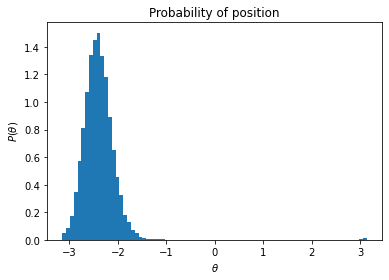

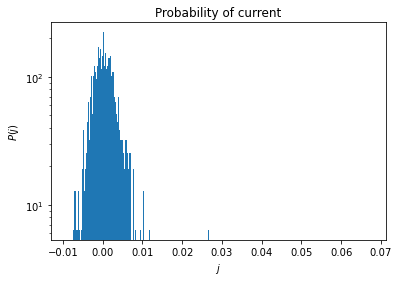

In [2]:
fig1 = plt.figure(1)
plt.hist(pos, bins=80, density=True)
plt.title('Probability of position')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

bins_manual=[]
for i in range(-15,30):
    bins_manual.append((2*np.pi*i-np.pi)/time2)   #data[2][4] is time

fig2 = plt.figure(2)
plt.hist(cur, bins=5000, density=True)
#plt.hist(cur, bins=bins_manual,density=True)
plt.title('Probability of current')
plt.xlabel('$j$')
plt.ylabel('$P(j)$')
plt.yscale('log')

plt.show()

In [7]:
pj=np.histogram(cur, bins=bins_manual, density=True)[0]
pjx=np.histogram(cur, bins=bins_manual, density=True)[1]
pjj=[]
pjjx=[]
for i in range(len(pj)-1):
    if pj[i]!=0:
        pjj.append(pj[i])
        pjjx.append((pjx[i+1]+pjx[i])/2)
pj2=(-1/time2)*np.log(pjj)

Area2=0
for i in range(len(pjjx)):
    Area2+=pjj[i]

Area=np.sum(pj)*(pjx[2]-pjx[1])
    
#Don't divide by area or area2. Useless


pj2=(-1/time2)*np.log(pjj)

In [160]:
Area

1.000000000000001

<function matplotlib.pyplot.show(close=None, block=None)>

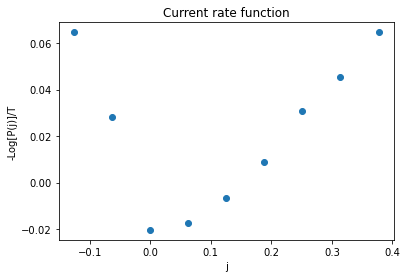

In [8]:
plt.scatter(pjjx,pj2)
plt.title('Current rate function')
plt.xlabel('j')
plt.ylabel('-Log[P(j)]/T')

plt.show

In [210]:
min(cur)

-0.02510343640535555

In [55]:
import numpy as np
import random, matplotlib.pyplot as plt, time, math

gamma,Radius_of_circle=1,1

ram0=1024

def brownian_v2(sigma,drift,potential_constant,iterations,time):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time]
    intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time/dt) #Total time
    std=np.sqrt(dt*sigma)
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(np.sin(theta))/Radius_of_circle)*dt)
            
        for k in range(len(theta)):
            if -np.pi<theta[k]<=np.pi:
                theta2[k]=theta[k]
            else:
                theta2[k]=-np.sign(theta[k])*np.pi+theta[k]-np.pi-int((theta[k]-np.pi)/(2*np.pi))*2*np.pi   
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()
    
    return pos,cur,C,#D

In [104]:
t1=time.perf_counter()
data=brownian_v2(0.3,0.1,1,256,3)
print(time.perf_counter()-t1)

0.5873084320046473


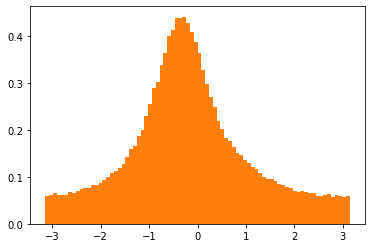

In [105]:
qj=plt.hist(data[0], bins=80, density=True)[0]
qjx=plt.hist(data[0], bins=80, density=True)[1]
qjj=[]
qjjx=[]
for i in range(len(qj)-1):
    if qj[i]!=0:
        qjj.append(qj[i])
        qjjx.append((qjx[i+1]+qjx[i])/2
qj2=(-1e-1)*np.log(qjj)

<function matplotlib.pyplot.show(close=None, block=None)>

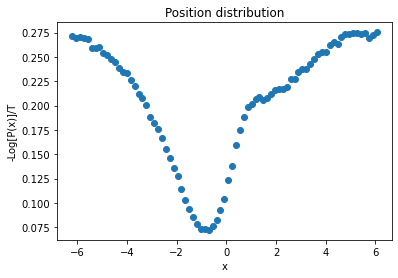

In [101]:
jupyter nbextension enable codefolding/mainplt.scatter(qjjx,qj2)
plt.title('Position distribution')
plt.xlabel('x')
plt.ylabel('-Log[P(x)]/T')

plt.show

In [25]:
min(cur)

-0.23849806549897842

In [9]:
print(len(bins_manual))

20


In [58]:
-np.arcsin(-Radius_of_circle*0.1/1)+np.pi

3.241760074751353

In [2]:
pj=plt.hist(cur, bins=bins_manual, density=True)[0]

NameError: name 'plt' is not defined